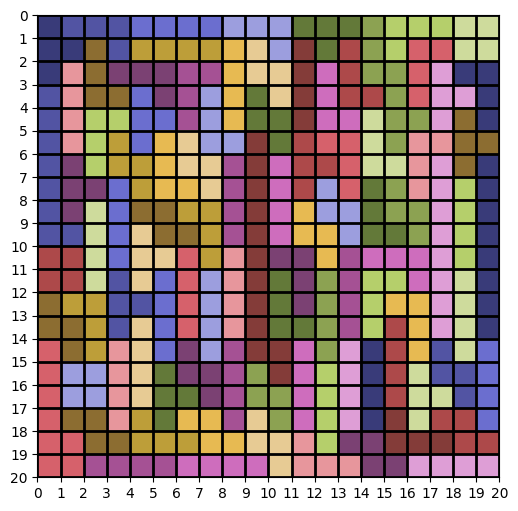

In [126]:
#colored output

import matplotlib.pyplot as plt
import numpy as np

# Load grid data from the file, removing empty lines
def load_grid(filename):
    with open(filename, 'r') as file:
        grid = [list(map(int, line.split())) for line in file if line.strip()]
    return np.array(grid)

# Visualize the grid using matplotlib
def visualize_grid(grid):
    unique_ids = np.unique(grid)
    num_colors = len(unique_ids)
    
    # Create a colormap with distinct colors, excluding white
    base_cmap = plt.get_cmap('tab20b')
    colors = [base_cmap(i % 20) for i in range(num_colors)]
    cmap = plt.cm.colors.ListedColormap(colors)
    
    plt.figure(figsize=(10, 6))  # Adjust for grid size
    plt.imshow(grid, cmap=cmap, interpolation='none', extent=[0, grid.shape[1], grid.shape[0], 0])

    # Adjust the gridlines to align with the grid cells
    plt.grid(which='both', color='black', linestyle='-', linewidth=2)
    plt.xticks(np.arange(0, grid.shape[1] + 1, 1))
    plt.yticks(np.arange(0, grid.shape[0] + 1, 1))
    plt.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.show()

# Load and visualize the grid
grid = load_grid('output/grid_output.txt')
visualize_grid(grid)

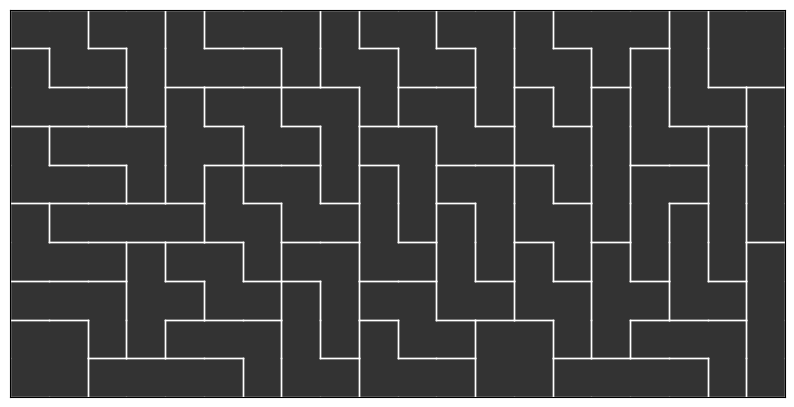

In [2]:
#tattoo output

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Load grid data from the file, removing empty lines
def load_grid(filename):
    with open(filename, 'r') as file:
        grid = [list(map(int, line.split())) for line in file if line.strip()]
    return np.array(grid)

# Function to check if a grid cell is connected to its neighbors
def is_connected(grid, row, col):
    connected = []
    if row > 0 and grid[row, col] == grid[row - 1, col]:
        connected.append('top')
    if row < grid.shape[0] - 1 and grid[row, col] == grid[row + 1, col]:
        connected.append('bottom')
    if col > 0 and grid[row, col] == grid[row, col - 1]:
        connected.append('left')
    if col < grid.shape[1] - 1 and grid[row, col] == grid[row, col + 1]:
        connected.append('right')
    return connected

# Visualize the grid with uniform color and invisible internal grid lines
def visualize_grid(grid):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.invert_yaxis()
    
    uniform_color = '#333'  # grey color for all tetrominoes

    for row in range(grid.shape[0]):
        for col in range(grid.shape[1]):
            if grid[row, col] != 0:
                connected = is_connected(grid, row, col)
                rect = patches.Rectangle((col, row), 1, 1, facecolor=uniform_color, edgecolor='none')
                ax.add_patch(rect)

                # Draw borders only where tetrominoes are not connected
                if 'top' not in connected:
                    ax.plot([col, col + 1], [row, row], color='white', lw=1)
                if 'bottom' not in connected:
                    ax.plot([col, col + 1], [row + 1, row + 1], color='white', lw=1)
                if 'left' not in connected:
                    ax.plot([col, col], [row, row + 1], color='white', lw=1)
                if 'right' not in connected:
                    ax.plot([col + 1, col + 1], [row, row + 1], color='white', lw=1)

    # Ensure the aspect ratio is equal
    ax.set_aspect('equal')
    
    # Disable the default grid and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    plt.show()

# Load and visualize the grid
grid = load_grid('output/grid_output.txt')
visualize_grid(grid)
